In [54]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [55]:
from helpers import load_data

# load dataset
x, y = load_data()

In [56]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [58]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    test_idx = k_indices[k,:]
    row_idx = list(range(k_indices.shape[0]))
    train_idx = k_indices[row_idx[:k]+row_idx[k+1:],:].flatten()
    y_train, x_train = y[train_idx], x[train_idx]
    y_test, x_test = y[test_idx], x[test_idx]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    x_train = build_poly(x_train, degree)
    x_test = build_poly(x_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    loss_tr, w = ridge_regression(y_train, x_train, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = np.sqrt(2*loss_tr)
    loss_te = np.sqrt(2*compute_mse(y_test, x_test, w))
    return loss_tr, loss_te

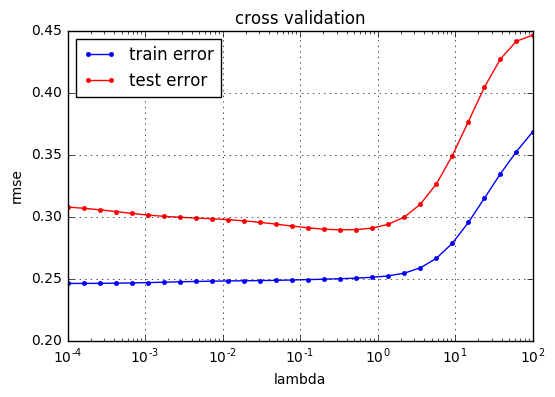

In [59]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    for lamb in lambdas:
        e_tr, e_te = zip(*[cross_validation(y, x, k_indices, k, lamb, degree) for k in range(k_fold)])
        e_tr, e_te = np.array(e_tr).mean(), np.array(e_te).mean()
        rmse_tr.append(e_tr)
        rmse_te.append(e_te)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [ ]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.8
    degrees = range(1, 10)
    lambdas = np.logspace(-4, 2, 30)
    
    k_fold = 4
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T

        y_train, x_train, y_test, x_test = split_data(x,y, ratio_train, seed=seed)
        k_indices = build_k_indices(y, k_fold, seed=seed)
        for index_deg, deg in enumerate(degrees):
            best_lbda = None
            best_te = None
            for lamb in lambdas:
                e_tr, e_te = zip(*[cross_validation(y, x, k_indices, k, lamb, deg) for k in range(k_fold)])
                e_tr, e_te = np.array(e_tr).mean(), np.array(e_te).mean()
                if not best_lbda:
                    best_lbda = lamb
                    best_te = e_te
                if best_te>e_te:
                    best_te = e_te
                    best_lbda = lamb
            e_tr, w = ridge_regression(y_train, build_poly(x_train, deg), best_lbda)
            e_tr = np.sqrt(2*e_tr)
            e_te = np.sqrt(2*compute_mse(y_test, build_poly(x_test, deg), w))
            rmse_tr[index_seed, index_deg] = e_tr
            rmse_te[index_seed, index_deg] = e_te

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()